In [1]:
import os
import anndata as ad
import numpy as np
import pandas as pd
import seaborn as sns
import scvi
import scanpy as sc
import squidpy as sq
import tangram as tg
import cellcharter as cc
import matplotlib.pyplot as plt
import matplotlib.colors as col
%matplotlib inline

#Set working directory
os.chdir("../")

Global seed set to 0


# Load Data

In [2]:
adata = sc.read_h5ad('GBMOrganoid/Checkpoints/xenium_organoids.h5ad')
adata.uns['spatial'] = {s: {} for s in adata.obs['sample'].unique()}
adata

AnnData object with n_obs × n_vars = 87518 × 266
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'PredCellType', 'sample', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', '_scvi_batch', '_scvi_labels', 'cluster_cellcharter'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'log1p', 'spatial_neighbors', 'spatial'
    obsm: 'X_cellcharter', 'X_scVI', 'spatial'
    layers: 'counts'
    obsp: 'spatial_connectivities', 'spatial_distances'

# Fig 3a - Spatial Celltypes

In [3]:
colpal_cells = ['#BEBEBE','#8968CD','#90EE90','#20B2AA','#F08080','#000080','#696969','#7EC0EE','#FFC125']
my_colors = col.ListedColormap(sns.color_palette(colpal_cells))

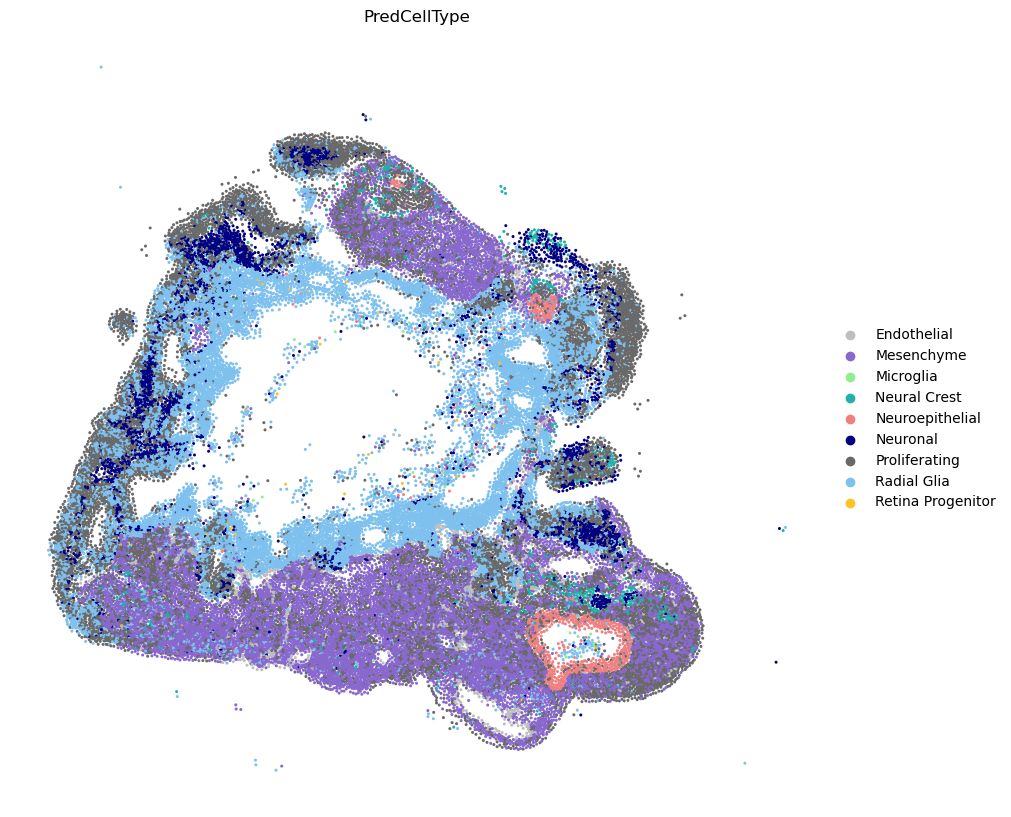

In [4]:
sq.pl.spatial_scatter(
    adata, 
    color=['PredCellType'], 
    library_key='sample',  
    size=5, 
    img=None,
    spatial_key='spatial',
    palette=my_colors,
    #connectivity_key='spatial_connectivities',
    #img_alpha=0.3,
    figsize=(10,10),
    ncols=1,
    #library_id=adata.obs['sample'].unique(),
    library_id=['WT'],
    frameon=False,title=None
)

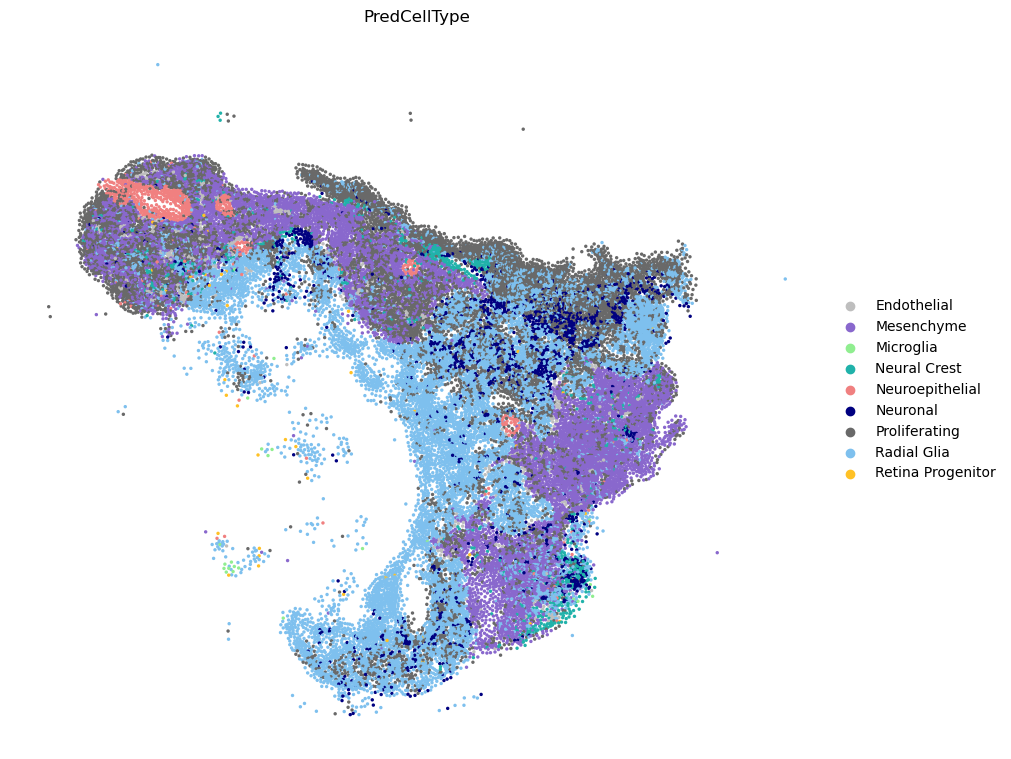

In [5]:
sq.pl.spatial_scatter(
    adata, 
    color=['PredCellType'], 
    library_key='sample',  
    size=5, 
    img=None,
    spatial_key='spatial',
    palette=my_colors,
    #connectivity_key='spatial_connectivities',
    #img_alpha=0.3,
    figsize=(10,10),
    ncols=1,
    #library_id=adata.obs['sample'].unique(),
    library_id=['PRO'],
    frameon=False,title=None
)

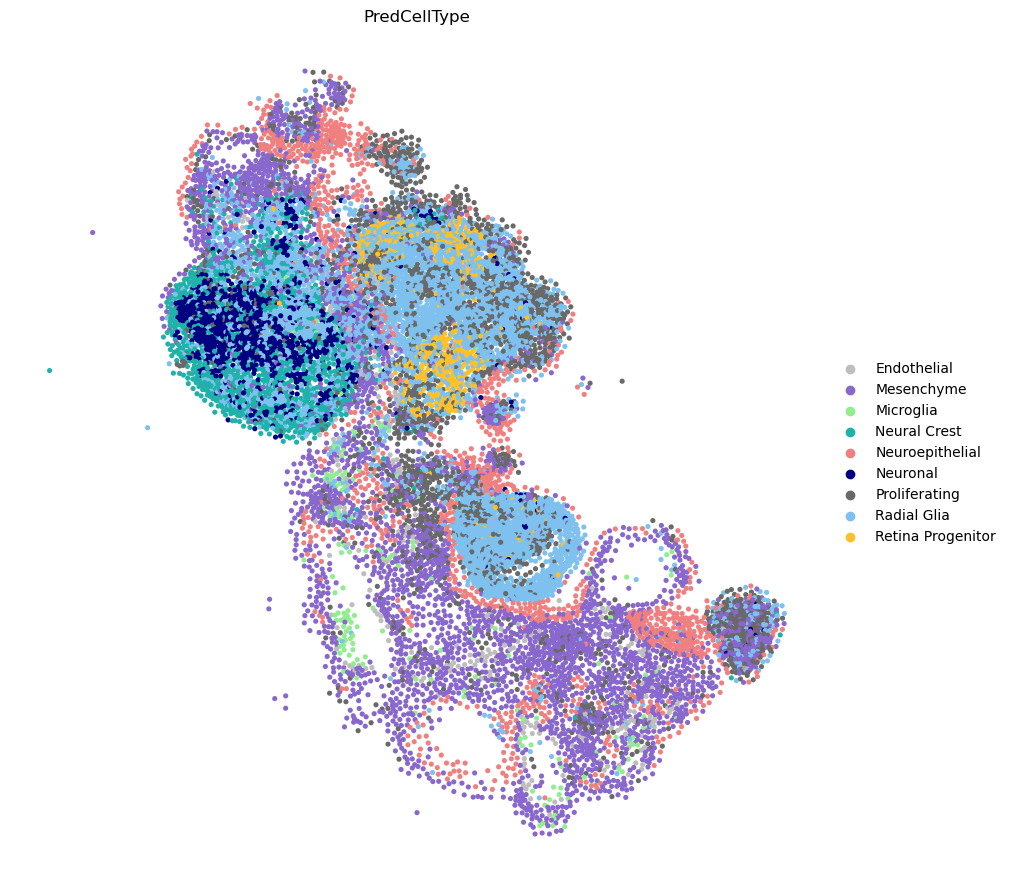

In [6]:
sq.pl.spatial_scatter(
    adata, 
    color=['PredCellType'], 
    library_key='sample',  
    size=5, 
    img=None,
    spatial_key='spatial',
    palette=my_colors,
    #connectivity_key='spatial_connectivities',
    #img_alpha=0.3,
    figsize=(10,10),
    ncols=1,
    #library_id=adata.obs['sample'].unique(),
    library_id=['MES'],
    frameon=False,title=None
)

# Fig 3b - Bar Predicted Cell Types

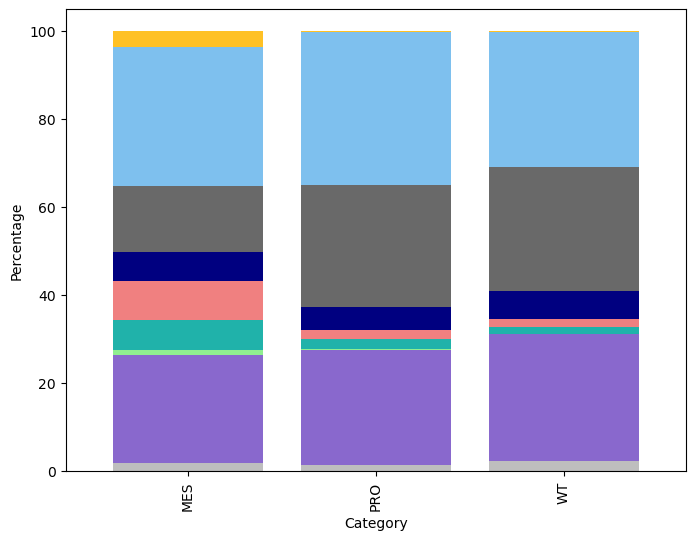

In [7]:
cross_tab = pd.crosstab(adata.obs['sample'],adata.obs['PredCellType'], normalize='index')*100
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(8, 6), cmap=my_colors, width=0.8)
ax.get_legend().remove()
# Add labels to the bars
for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
# Set labels and title
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.rcParams['figure.figsize'] = [10, 10]

# Fig 3c - Spatial Clusters

In [34]:
colpal_clusters = ['#E69F00','#56B4E9','#009E73','#0072B2','#D55E00']
my_colors2 = col.ListedColormap(sns.color_palette(colpal_clusters))

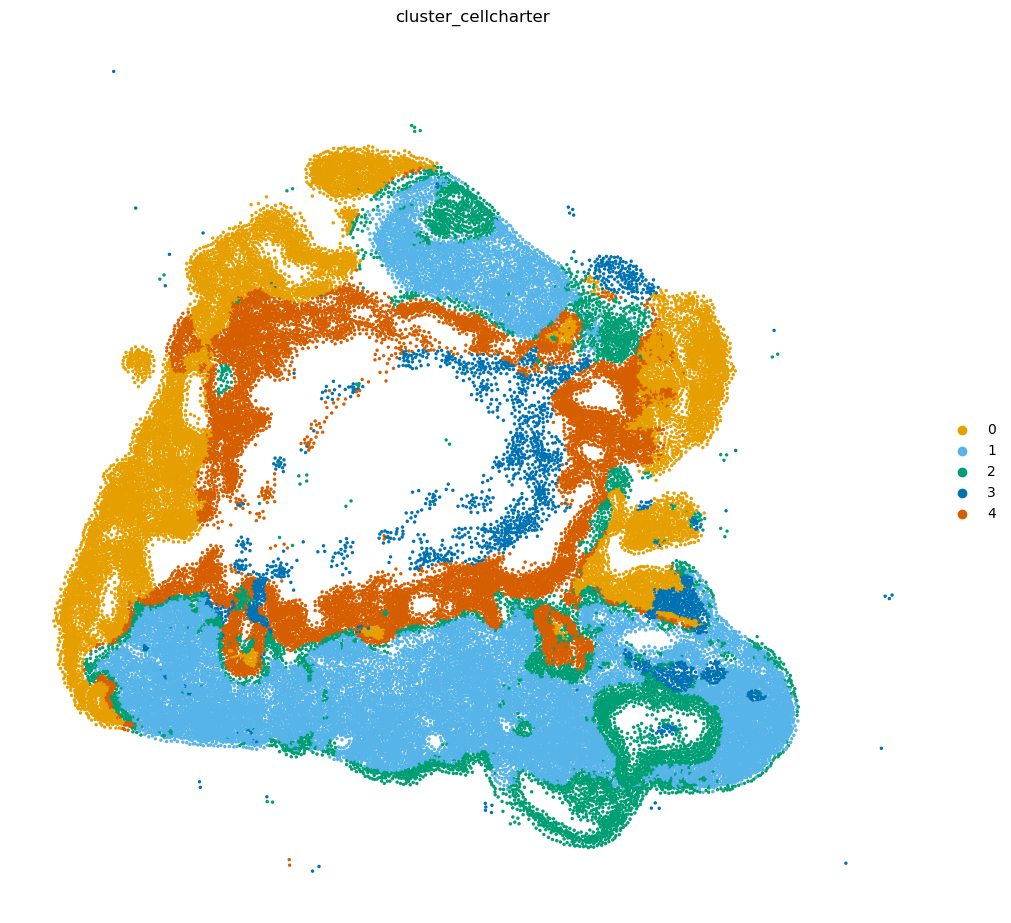

In [35]:
sq.pl.spatial_scatter(
    adata, 
    color=['cluster_cellcharter'], 
    library_key='sample',  
    size=5, 
    img=None,
    spatial_key='spatial',
    palette=my_colors2,
    #connectivity_key='spatial_connectivities',
    #img_alpha=0.3,
    figsize=(10,10),
    ncols=1,
    #library_id=adata.obs['sample'].unique(),
    library_id=['WT'],
    frameon=False,title=None
)

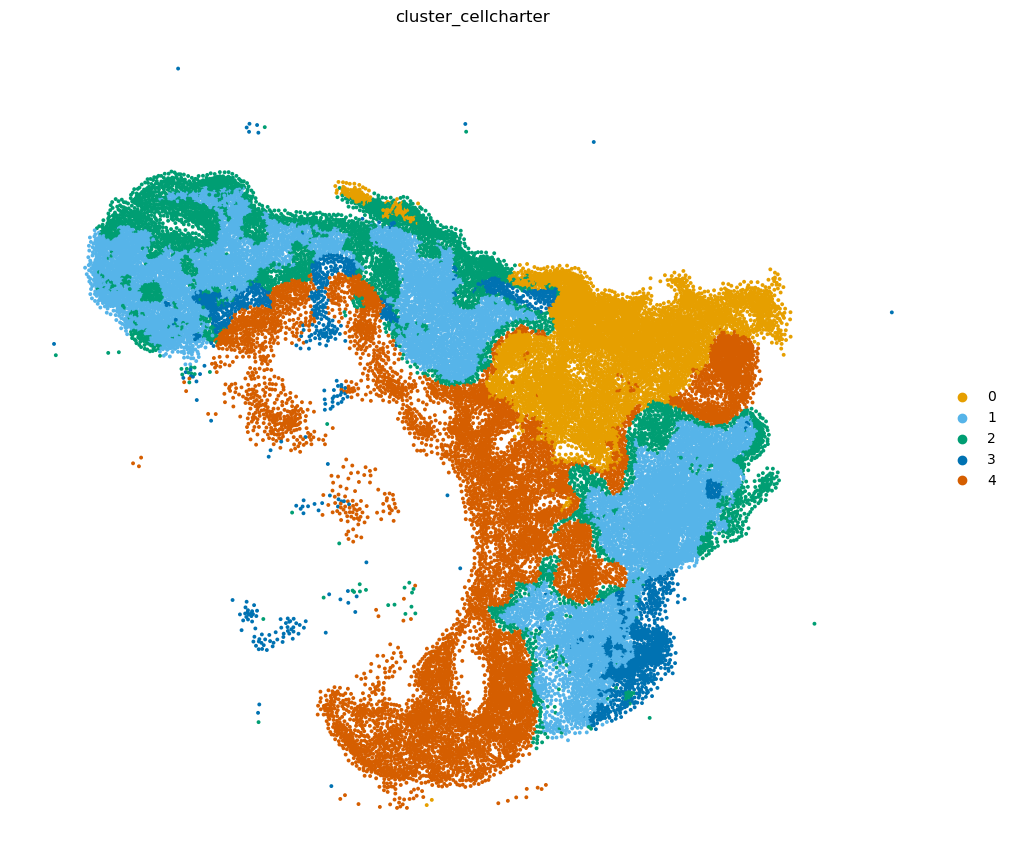

In [36]:
sq.pl.spatial_scatter(
    adata, 
    color=['cluster_cellcharter'], 
    library_key='sample',  
    size=5, 
    img=None,
    spatial_key='spatial',
    palette=my_colors2,
    #connectivity_key='spatial_connectivities',
    #img_alpha=0.3,
    figsize=(10,10),
    ncols=1,
    #library_id=adata.obs['sample'].unique(),
    library_id=['PRO'],
    frameon=False,title=None
)

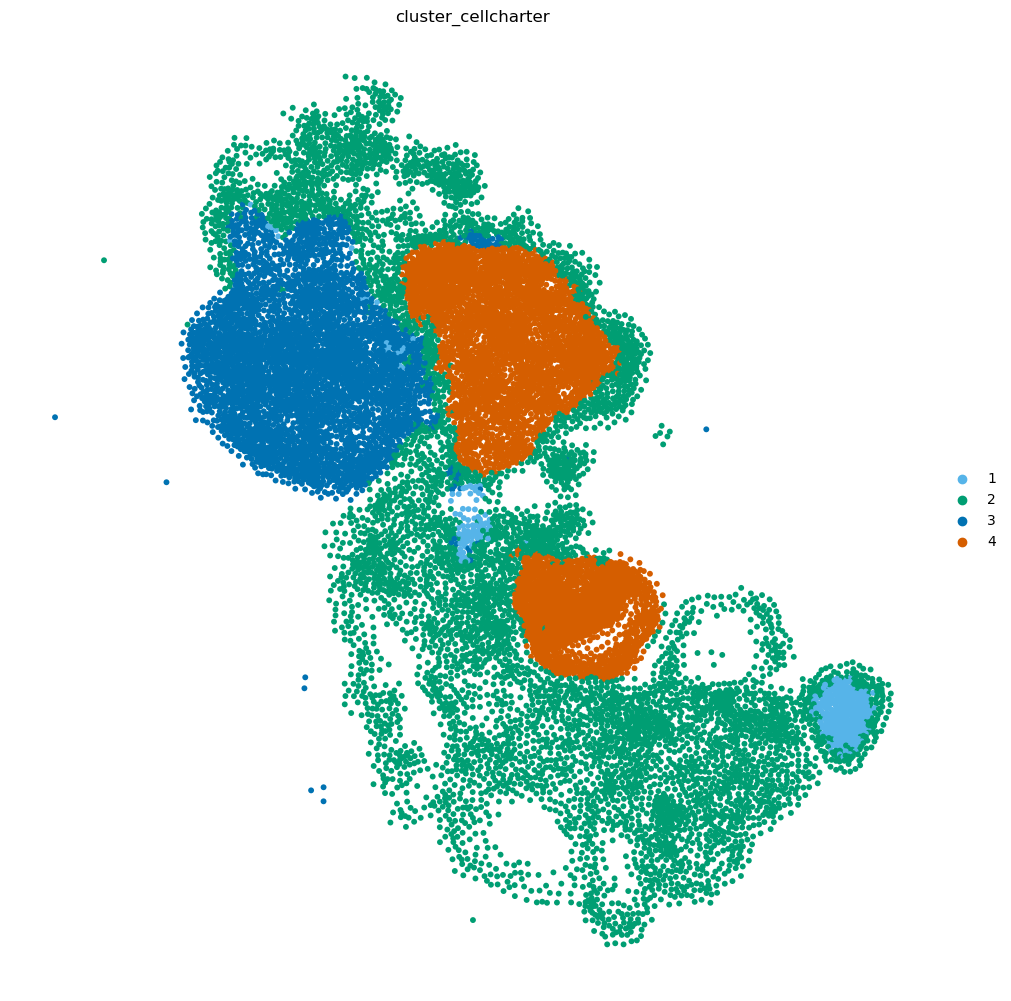

In [40]:
colpal = ['#56B4E9','#009E73','#0072B2','#D55E00']
col = col.ListedColormap(sns.color_palette(colpal))

sq.pl.spatial_scatter(
    adata, 
    color=['cluster_cellcharter'], 
    library_key='sample',  
    size=5, 
    img=None,
    spatial_key='spatial',
    palette=col,
    #connectivity_key='spatial_connectivities',
    #img_alpha=0.3,
    figsize=(10,10),
    ncols=1,
    #library_id=adata.obs['sample'].unique(),
    library_id=['MES'],
    frameon=False,title=None, save="GBMOrganoid/Figures/MES_clusters.jpg")

# Fig 3d - Bar Clusters

In [44]:
bar_colors = ['#E69F00', '#56B4E9', '#009E73', '#0072B2', '#D55E00']

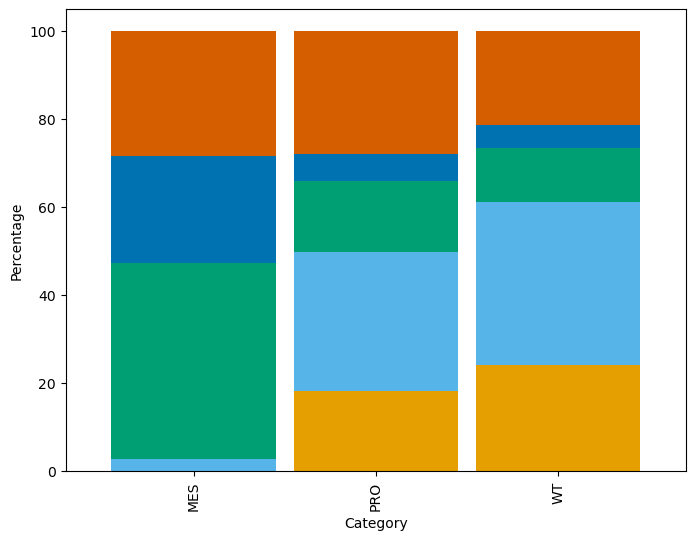

In [45]:
cross_tab = pd.crosstab(adata.obs['sample'],adata.obs['cluster_cellcharter'], normalize='index')*100
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(8, 6), color=bar_colors, width=0.9)
ax.get_legend().remove()
# Add labels to the bars
for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
# Set labels and title
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.rcParams['figure.figsize'] = [10, 10]

# Fig 3e - Proximty Analysis

<Figure size 600x600 with 0 Axes>

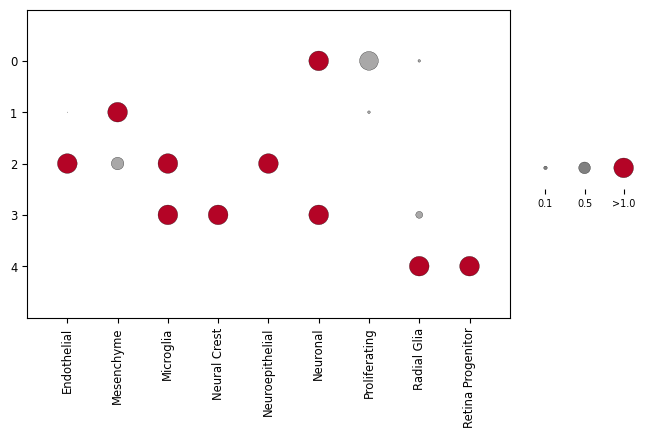

In [13]:
cc.gr.enrichment(adata, group_key='PredCellType', label_key='cluster_cellcharter')

plt.figure(figsize=(6,6))
cc.pl.enrichment(adata, group_key='PredCellType', label_key='cluster_cellcharter', cluster_labels=False, color_threshold=1, size_threshold=1,
                figsize=(8,4), save="GBMOrganoid/Figures/Proximity.png")

# Fig 3f - Neighborhood Enrichment Differences

In [14]:
key_cell = 'PredCellType'
key_cluster = 'cluster_cellcharter'

  0%|          | 0/1 [00:00<?, ?it/s]

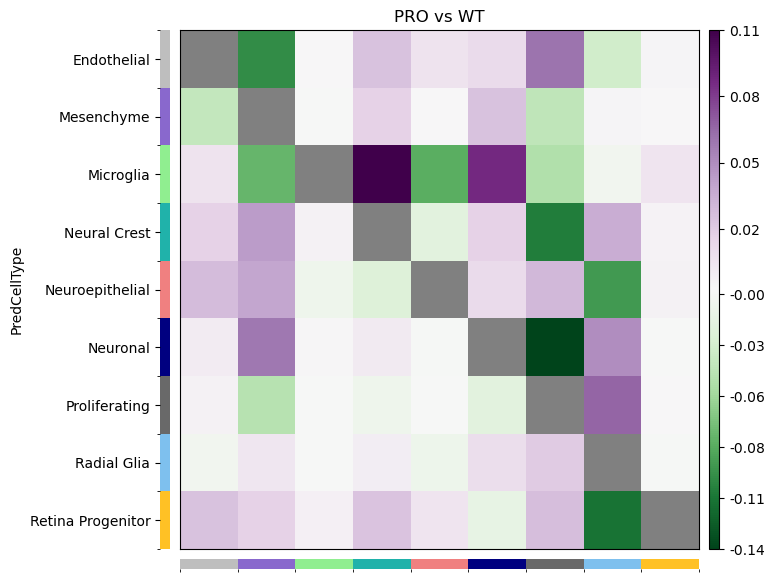

In [15]:
cats = ('WT','PRO')
adata_wt_pro = adata[adata.obs['sample'].isin(cats)]

cc.gr.diff_nhood_enrichment(
    adata_wt_pro,
    cluster_key= key_cell,
    condition_key='condition',
    library_key='sample',
    pvalues=True,
    n_jobs=15,
    n_perms=1
)

cc.pl.diff_nhood_enrichment(
    adata_wt_pro,
    cluster_key= key_cell,
    condition_key='condition',
    condition_groups=['PRO', 'WT'],
    annotate=False,
    figsize=(7,7),
    save="GBMOrganoid/Figures/WTvsPROcelltypes_diffnhoodenrich.jpg"
)

  0%|          | 0/1 [00:00<?, ?it/s]

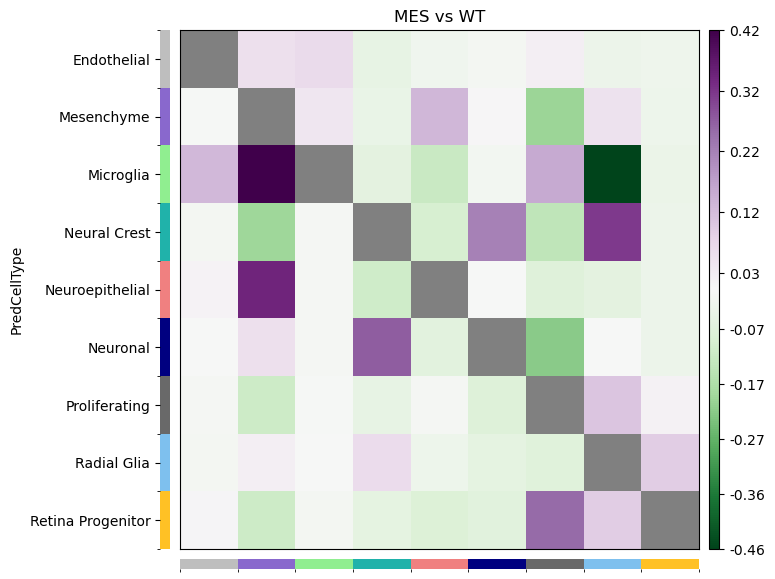

In [17]:
cats = ('WT','MES')
adata_wt_mes = adata[adata.obs['sample'].isin(cats)]

cc.gr.diff_nhood_enrichment(
    adata_wt_mes,
    cluster_key= key_cell,
    condition_key='condition',
    library_key='sample',
    pvalues=True,
    n_jobs=15,
    n_perms=1
)

cc.pl.diff_nhood_enrichment(
    adata_wt_mes,
    cluster_key= key_cell,
    condition_key='condition',
    condition_groups=['MES', 'WT'],
    annotate=False,
    figsize=(7,7),
    save="GBMOrganoid/Figures/WTvsMEScelltypes_diffnhoodenrich.jpg"
)

# Gene Expression Visualization

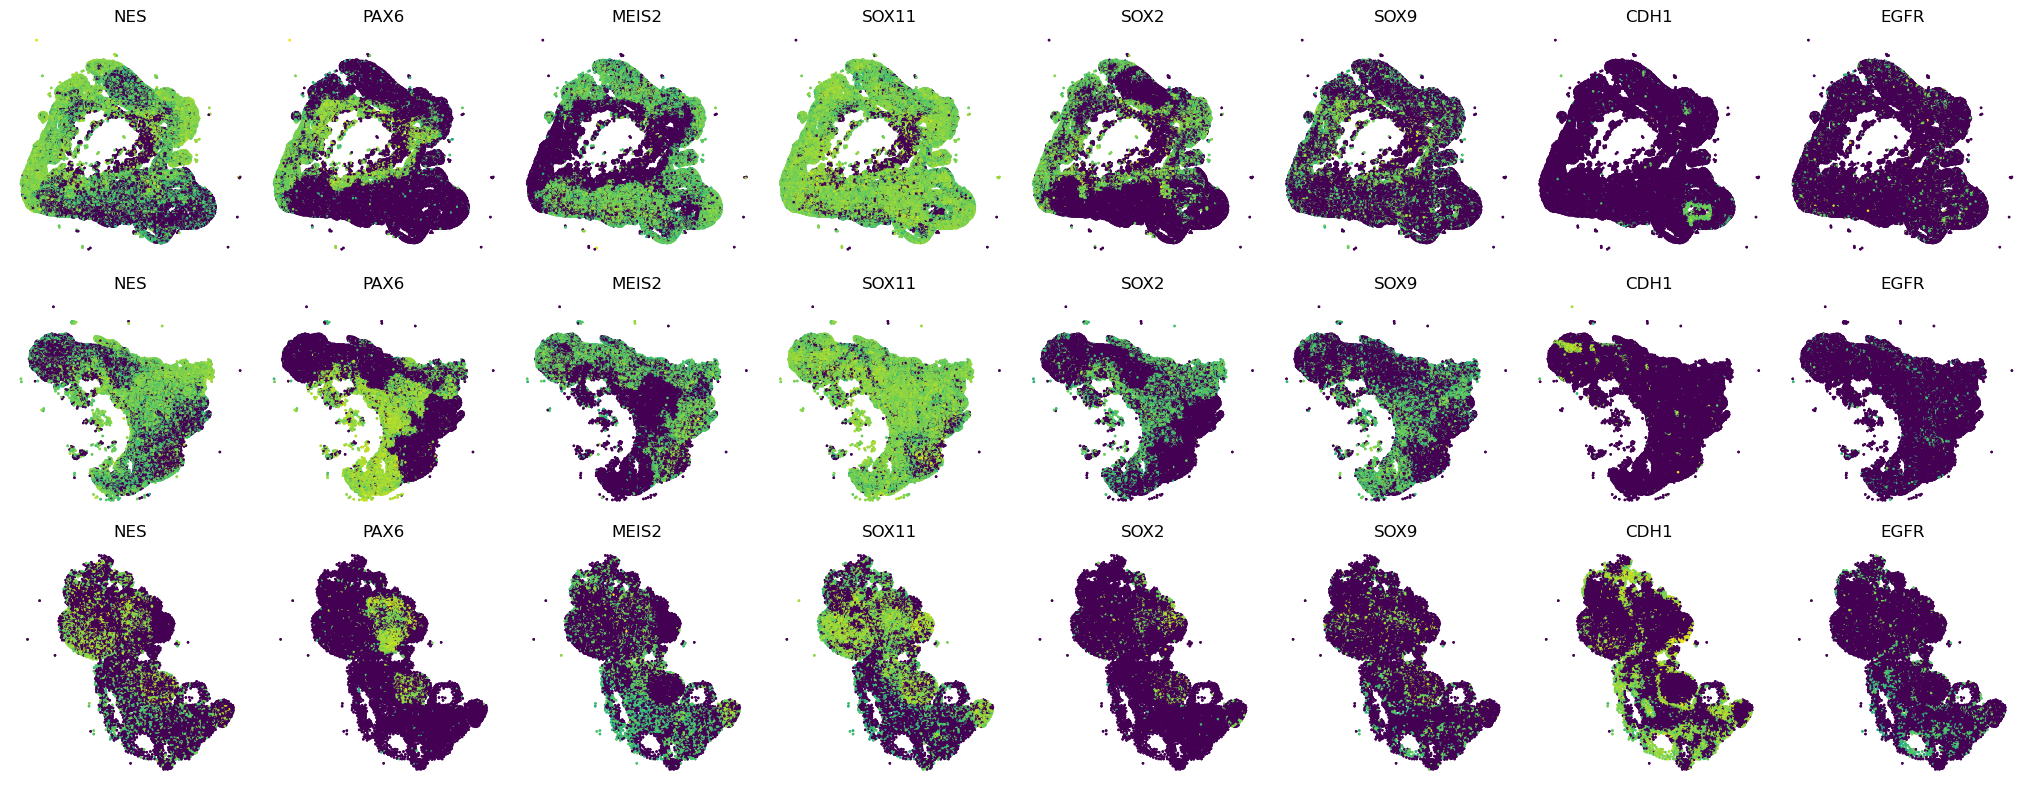

In [3]:
sq.pl.spatial_scatter(
    adata,
    library_key="sample",
    spatial_key='spatial',
    color=["NES","PAX6","MEIS2","SOX11","SOX2","SOX9","CDH1","EGFR"],
    library_id=['WT','PRO','MES'],
    shape=None,
    size=3,
    img=False,
    ncols=8,
    figsize=(3,3),
    wspace=0.05,hspace=0.1,
    frameon=False,
    library_first=True,
    colorbar=False
)

In [6]:
key_cell = 'PredCellType'

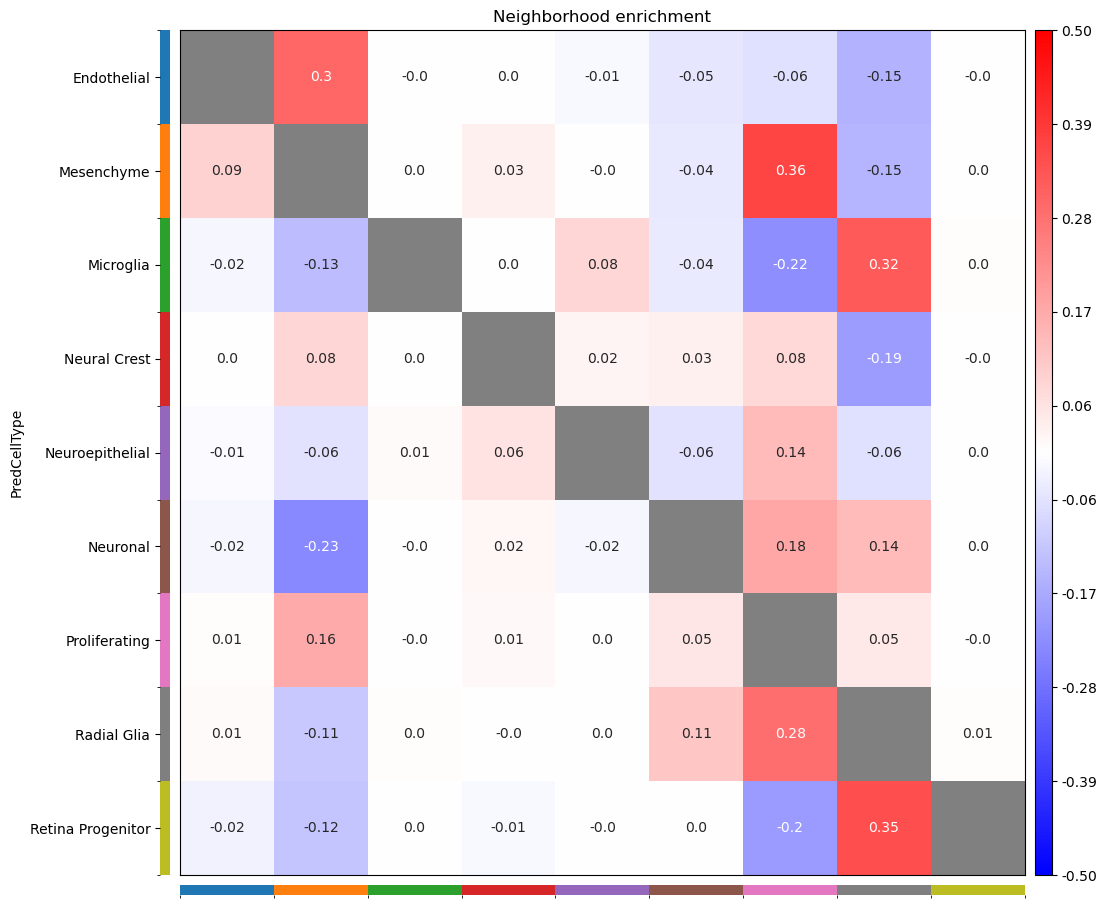

In [7]:
adata_wt = adata[adata.obs['condition'] == 'WT']

cc.gr.nhood_enrichment(
    adata_wt,
    cluster_key= key_cell,
)

cc.pl.nhood_enrichment(
    adata_wt,
    cluster_key= key_cell,
    annotate=True,
    vmin=-0.5,
    vmax=0.5
)

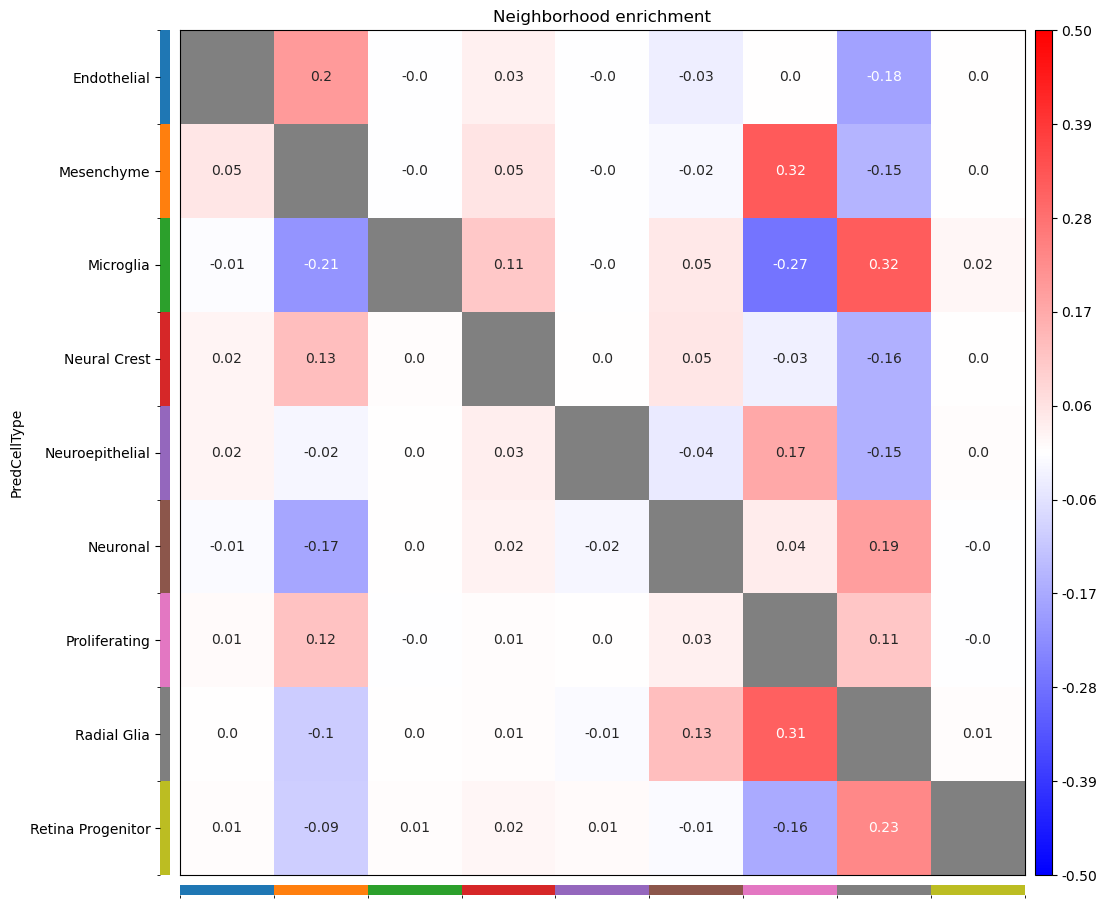

In [8]:
adata_pro = adata[adata.obs['condition'] == 'PRO']

cc.gr.nhood_enrichment(
    adata_pro,
    cluster_key= key_cell,
)

cc.pl.nhood_enrichment(
    adata_pro,
    cluster_key= key_cell,
    annotate=True,
    vmin=-0.5,
    vmax=0.5
)

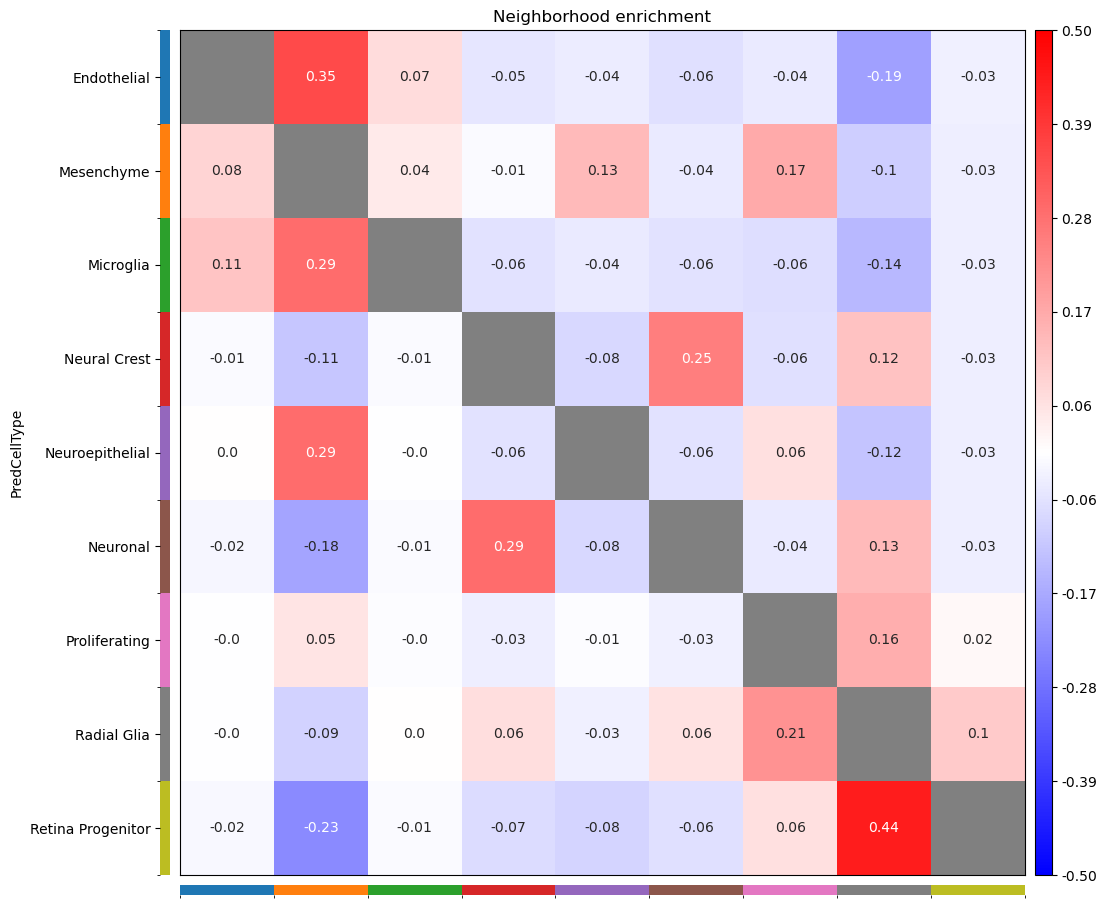

In [9]:
adata_mes = adata[adata.obs['condition'] == 'MES']

cc.gr.nhood_enrichment(
    adata_mes,
    cluster_key= key_cell,
)

cc.pl.nhood_enrichment(
    adata_mes,
    cluster_key= key_cell,
    annotate=True,
    vmin=-0.5,
    vmax=0.5
)